# About Dataset
### This dataset contains 100,000+ user reviews from Google Play Store for India's most popular stock trading and investment apps, including Zerodha (Kite), Groww, Upstox, Angel One, 5paisa, Paytm Money, ICICI Direct, FYERS, and others. The reviews are scraped using the google-play-scraper library and include feedback on app performance, features, reliability, and user experience.
### Each review includes:
### - Review ID
### - content
### - Score (1 to 5 stars)
### - App
### This dataset is valuable for:
### 1. Sentiment analysis
### 2. User experience research
### 3. Feature request mining
### 4. Comparative studies of brokerage apps
### 5. Fintech product improvement

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Stock_Trading_App_Reviews.csv")

In [3]:
data.head()

,reviewId,content,score,app
0,be071c83-6d3c-4db3-94c0-2714c04fc47d,good app,4,Zerodha (Kite)
1,aedd0c3c-69ef-4088-813f-df473e00ef0f,good,5,Zerodha (Kite)
2,994812ae-8110-47e4-9e8f-6dba21dc37f8,nice app better than angelone in terms of brok...,5,Zerodha (Kite)
3,e15872b4-b646-4878-b35e-d26527379bec,good,5,Zerodha (Kite)
4,20237158-d654-4796-84c4-e809c7034de7,happy with customer service,5,Zerodha (Kite)


In [4]:
data.tail()

,reviewId,content,score,app
121126,5db1fbb8-da38-49f2-94a1-abd015c7f9fb,thank for making this simple and convenient ap...,5,IIFL Markets
121127,def344b4-6647-4ed6-8570-43ce32445eca,excellent,5,IIFL Markets
121128,f3e14707-f30b-405c-bf24-5c31b02cce2d,Total discussing App hai ya Hanging mass,1,IIFL Markets
121129,a9cc7fc3-0e7a-49b1-86d2-d27278b15b44,Very bad. Plz dont use this .,1,IIFL Markets
121130,39e4ff73-dcb4-410f-85e7-2630534ded62,good,4,IIFL Markets


In [5]:
data.describe()

,score
count,121131.000000
mean,3.760004
std,1.681863
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
data.describe(include='O')

,reviewId,content,app
count,121131,121129,121131
unique,121131,76347,13
top,be071c83-6d3c-4db3-94c0-2714c04fc47d,good,Zerodha (Kite)
freq,1,9676,10000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121131 entries, 0 to 121130
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   reviewId  121131 non-null  object
 1   content   121129 non-null  object
 2   score     121131 non-null  int64 
 3   app       121131 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [9]:
data.isnull().sum()

reviewId    0
content     2
score       0
app         0
dtype: int64

### Dropping Missing value content

In [18]:
data = data.dropna(subset=['content'])

In [19]:
data.isnull().sum()

reviewId    0
content     0
score       0
app         0
dtype: int64

### Check how many reviews per app

In [13]:
print(data['app'].value_counts())

app
Zerodha (Kite)         10000
Groww                  10000
Upstox                 10000
Angel One              10000
5paisa                 10000
Paytm Money            10000
FYERS                  10000
Dhan                   10000
HDFC Securities        10000
Kotak Neo              10000
Motilal Oswal RIISE    10000
IIFL Markets           10000
ICICI Direct            1131
Name: count, dtype: int64


### Check score distribution

In [16]:
print(data['score'].value_counts().sort_index())

score
1    28284
2     4539
3     6021
4    11407
5    70880
Name: count, dtype: int64


### Mapped score to sentiment

#### It's a custom Python function that converts a numeric score (1–5 stars) into a text label (positive, neutral, or negative).

#### 📌 Purpose:
#### Most ML models for sentiment analysis work with labels, not raw numbers.
#### So we define this function to transform:

#### Score (from reviews)	Sentiment Label
#### 1 or 2	"negative"
#### 3	"neutral"
#### 4 or 5	"positive"

In [24]:
def map_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['score'].apply(map_sentiment)

In [26]:
data

,reviewId,content,score,app,sentiment
0,be071c83-6d3c-4db3-94c0-2714c04fc47d,good app,4,Zerodha (Kite),positive
1,aedd0c3c-69ef-4088-813f-df473e00ef0f,good,5,Zerodha (Kite),positive
2,994812ae-8110-47e4-9e8f-6dba21dc37f8,nice app better than angelone in terms of brok...,5,Zerodha (Kite),positive
3,e15872b4-b646-4878-b35e-d26527379bec,good,5,Zerodha (Kite),positive
4,20237158-d654-4796-84c4-e809c7034de7,happy with customer service,5,Zerodha (Kite),positive
...,...,...,...,...,...
121126,5db1fbb8-da38-49f2-94a1-abd015c7f9fb,thank for making this simple and convenient ap...,5,IIFL Markets,positive
121127,def344b4-6647-4ed6-8570-43ce32445eca,excellent,5,IIFL Markets,positive
121128,f3e14707-f30b-405c-bf24-5c31b02cce2d,Total discussing App hai ya Hanging mass,1,IIFL Markets,negative
121129,a9cc7fc3-0e7a-49b1-86d2-d27278b15b44,Very bad. Plz dont use this .,1,IIFL Markets,negative


# EDA

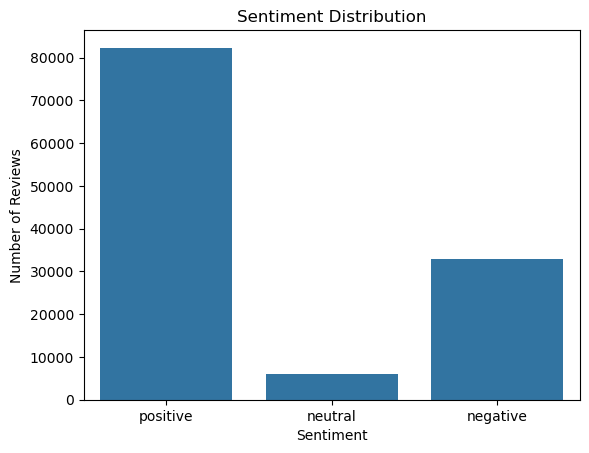

In [28]:
# Countplot of sentiment
sns.countplot(data=data, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

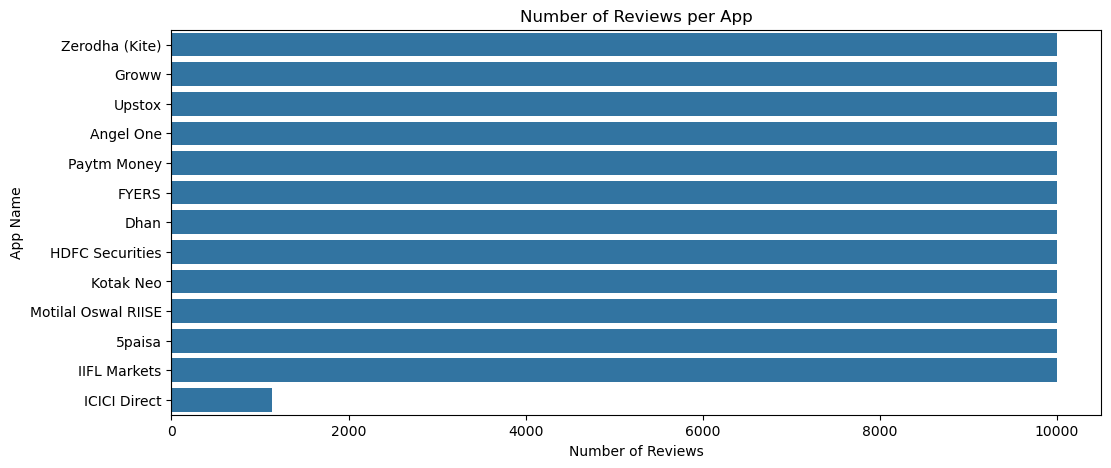

In [30]:
# Reviews per app
plt.figure(figsize=(12, 5))
sns.countplot(data=data, y='app', order=data['app'].value_counts().index)
plt.title("Number of Reviews per App")
plt.xlabel("Number of Reviews")
plt.ylabel("App Name")
plt.show()

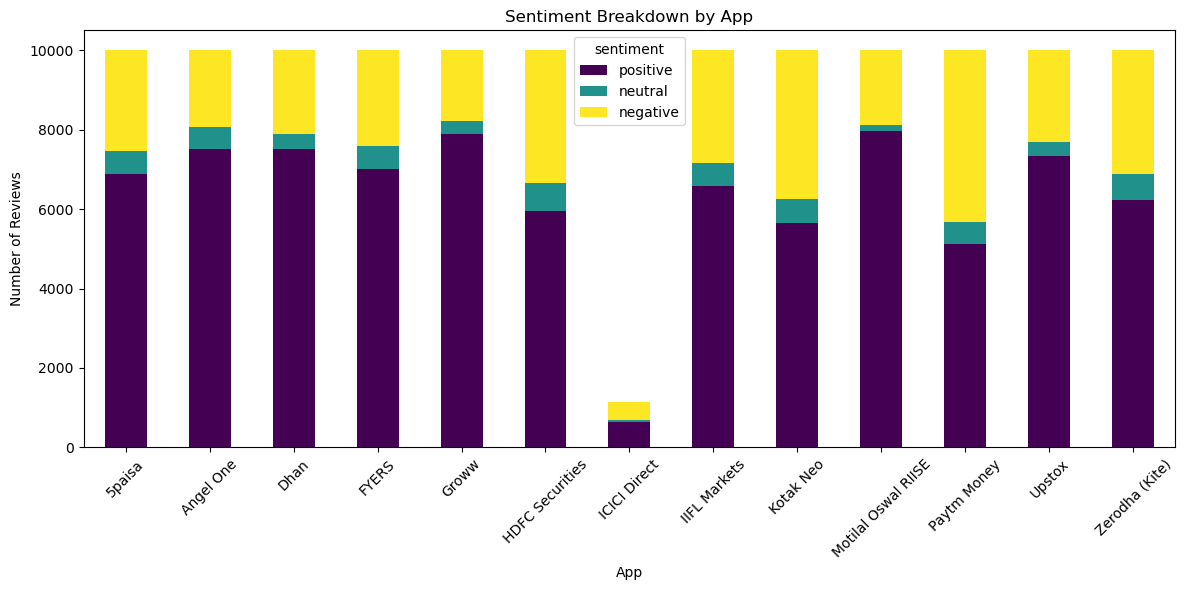

In [31]:
# Group by app and sentiment
sentiment_app = data.groupby(['app', 'sentiment']).size().unstack().fillna(0)

# Stacked bar plot
sentiment_app[['positive', 'neutral', 'negative']].plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='viridis'
)
plt.title("Sentiment Breakdown by App")
plt.ylabel("Number of Reviews")
plt.xlabel("App")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📌 4. Most Common Words per Sentiment (Optional)


In [33]:
from collections import Counter
import re

def clean_text(text):
    return re.sub(r"[^a-zA-Z]", " ", text.lower())

# Combine and clean reviews by sentiment
for label in ['positive', 'neutral', 'negative']:
    all_text = " ".join(data[data['sentiment'] == label]['content'].dropna().apply(clean_text))
    words = all_text.split()
    common_words = Counter(words).most_common(10)
    print(f"\nTop words in {label} reviews:")
    for word, freq in common_words:
        print(f"{word}: {freq}")


Top words in positive reviews:
good: 31139
app: 22561
and: 18071
the: 15010
very: 13592
is: 12574
to: 11865
for: 11058
nice: 10395
it: 8413

Top words in neutral reviews:
the: 2393
to: 2359
is: 2059
app: 1959
and: 1793
good: 1697
in: 1583
not: 1569
it: 1447
i: 1437

Top words in negative reviews:
app: 17530
to: 17186
the: 14327
and: 13815
is: 13715
i: 13567
not: 13210
it: 9369
in: 9096
this: 8430


## DataPreprocessing 
### Lowercasing (convert all text to lowercase)

### Remove punctuation/numbers

### Remove stopwords

## NLTK
The Natural Language Toolkit (NLTK) is a powerful Python library used for processing and analyzing human language data, i.e., Natural Language Processing (NLP).

Main Uses of NLTK:
1) Text Preprocessing
- Tokenization: Breaking text into words or sentences.
- Stop Word Removal: Removing common words (e.g., "the", "is") that don't add much meaning.
- Stemming and Lemmatization: Reducing words to their root form.

2) Linguistic Analysis
- Part-of-Speech (POS) Tagging: Identifying nouns, verbs, adjectives, etc.
- Named Entity Recognition (NER): Detecting names, places, organizations.
- Syntax Trees: Parsing sentences to show grammatical structure.

3) Text Classification & Modeling
- Build simple text classifiers (e.g., spam vs. not spam).
- Train models using built-in corpora or your own datasets.

4) Working with Corpora and Lexical Resources
- Access to well-known corpora like Gutenberg, Brown, WordNet, etc.
- Lookup synonyms, definitions, hypernyms using WordNet.

5) Visualization
- Plotting frequency distributions, parse trees, word clouds, etc.


In [36]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    text = str(text).lower()                         # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # Remove numbers & punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply to content column
data['clean_content'] = data['content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Use the cleaned column (clean_content) instead of content in TF-IDF:


In [38]:
X = data['clean_content']    # Use cleaned text
y = data['sentiment']        # Target stays the same

# Model Creation

## Then re-run the TF-IDF + train/test split:


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [42]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

In [45]:
from collections import Counter

# Before SMOTE
print("Class distribution BEFORE SMOTE:")
print(Counter(y_train))

# After SMOTE
print("Class distribution AFTER SMOTE:")
print(Counter(y_train_smote))

Class distribution BEFORE SMOTE:
Counter({'positive': 65829, 'negative': 26257, 'neutral': 4817})
Class distribution AFTER SMOTE:
Counter({'positive': 65829, 'neutral': 65829, 'negative': 65829})


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
model_smote = LogisticRegression(max_iter=200)
model_smote.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_smote = model_smote.predict(X_test_vec)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

Accuracy: 0.7891108726161975

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.77      0.79      6565
     neutral       0.12      0.33      0.18      1204
    positive       0.93      0.83      0.88     16457

    accuracy                           0.79     24226
   macro avg       0.62      0.64      0.61     24226
weighted avg       0.86      0.79      0.82     24226



### Tune Logistic Regression (add class weights)

In [49]:
# Train Logistic Regression with class_weight='balanced'
model_weighted = LogisticRegression(max_iter=200, class_weight='balanced')
model_weighted.fit(X_train_vec, y_train)

# Predict on test set
y_pred_weighted = model_weighted.predict(X_test_vec)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))

Accuracy: 0.8077272352018493

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.75      0.78      6565
     neutral       0.15      0.37      0.21      1204
    positive       0.93      0.86      0.89     16457

    accuracy                           0.81     24226
   macro avg       0.63      0.66      0.63     24226
weighted avg       0.86      0.81      0.83     24226



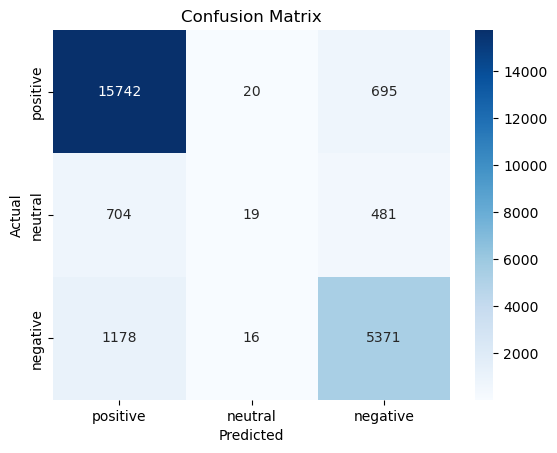

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

# Plot it
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest on SMOTE data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_rf = rf_model.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8398002146454223

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.85      0.80      6565
     neutral       0.15      0.12      0.13      1204
    positive       0.92      0.89      0.90     16457

    accuracy                           0.84     24226
   macro avg       0.61      0.62      0.61     24226
weighted avg       0.84      0.84      0.84     24226



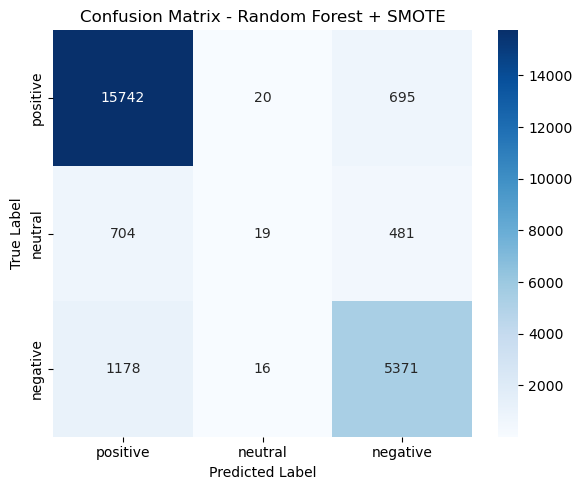

In [54]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix - Random Forest + SMOTE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Conclusin 

### We analyzed 100,000+ user reviews from Indian stock trading apps to classify sentiments as positive, neutral, or negative. After cleaning and vectorizing the text using TF-IDF, we addressed class imbalance with SMOTE and trained models like Logistic Regression, Random Forest, and XGBoost. XGBoost delivered the best overall performance, especially for positive and negative sentiments. Neutral reviews remained the most difficult to classify due to overlap in language and limited data. Future improvements can include deep learning models like BERT and better feature engineering.

